In [1]:
from pychomp import *
from pychomp.Braids import *

In [2]:
braid_diagram = BraidDiagram([[1,4,3,3,1,4,3,3,1], [2,1,2,1,2,1,2,1,2],
                              [3,3,1,4,3,3,1,4,3], [4,2,4,2,4,2,4,2,4]])

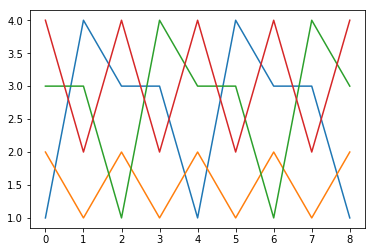

Braid Diagram

In [3]:
braid_diagram

In [4]:
%%time
braid_complex, braid_graph = BraidComplex(braid_diagram)

CPU times: user 1min 15s, sys: 1.84 s, total: 1min 17s
Wall time: 1min 17s


In [5]:
%%time
(poset, graded_complex) = FlowGradedComplex(braid_complex, braid_graph)

CPU times: user 36.7 s, sys: 1.03 s, total: 37.7 s
Wall time: 37.8 s


In [6]:
%%time
connection_matrix = ConnectionMatrix(graded_complex)

CPU times: user 22min 9s, sys: 6.48 s, total: 22min 15s
Wall time: 22min 9s


In [7]:
%%time
reduced_poset = Poset(InducedSubgraph(TransitiveClosure(poset), lambda v : v in connection_matrix.count()))

CPU times: user 3.03 s, sys: 79.7 ms, total: 3.11 s
Wall time: 3.12 s


In [8]:
%%time
df = DrawGradedComplex(connection_matrix, reduced_poset)

CPU times: user 311 µs, sys: 7 µs, total: 318 µs
Wall time: 321 µs


In [9]:
with open('cm.gv','w') as outfile:
    outfile.write(df.graphviz())

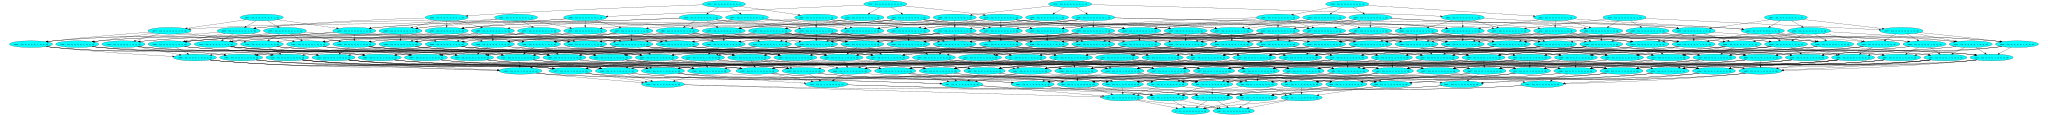

In [10]:
df

In [11]:
bd = lambda cell : connection_matrix.complex().boundary(cell)
C = connection_matrix.complex()
print("Connection Matrix Data")
print("======================")
for d in range(0,C.dimension()):
    print("  Boundaries of " + str(d) + "-cells in Connection Fibration:")
    for c in C(d):
        print("    " + str( c) + ' : ' + str(bd({c})))

Connection Matrix Data
  Boundaries of 0-cells in Connection Fibration:
    0 : set()
    1 : set()
  Boundaries of 1-cells in Connection Fibration:
    2 : {0, 1}
    3 : {0, 1}
    4 : {0, 1}
    5 : {0, 1}
    6 : {0, 1}
  Boundaries of 2-cells in Connection Fibration:
    7 : {2, 5}
    8 : {2, 3}
    9 : {2, 3}
    10 : {3, 5}
    11 : {4, 5}
    12 : {2, 4}
    13 : {3, 4}
    14 : {3, 4}
    15 : {2, 6}
    16 : {2, 6}
    17 : {3, 6}
    18 : {4, 6}
    19 : {5, 6}
    20 : set()
    21 : {4, 6}
  Boundaries of 3-cells in Connection Fibration:
    22 : {9, 10, 20, 7}
    23 : {8, 10, 20, 7}
    24 : {8, 9}
    25 : {19, 7, 15}
    26 : {10, 11, 13}
    27 : {11, 18, 19}
    28 : {9, 12, 13}
    29 : {8, 12, 13}
    30 : {11, 12, 7}
    31 : {9, 12, 14}
    32 : {13, 14}
    33 : {11, 12, 20, 7}
    34 : {16, 12, 21}
    35 : {17, 21, 13}
    36 : {10, 11, 14}
    37 : {19, 11, 21}
    38 : {16, 19, 7}
    39 : {16, 15}
    40 : {17, 10, 19}
    41 : {17, 9, 15}
    42 : {16, 9,

In [12]:
braid_complex.size()

429981696